In [132]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [133]:
!ls '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab6_Files/'
path='/content/gdrive/My Drive/CMPUT 206 Wi19/Lab6_Files/'

img_name = path +'lab6.bmp'

lab6.bmp  Lab6.ipynb  part1_3.png  part1_5.png	part2_3.png  part3_3.png


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, img_as_ubyte
from scipy.signal import convolve2d as conv2
import scipy.ndimage
import skimage
import math

# Part1

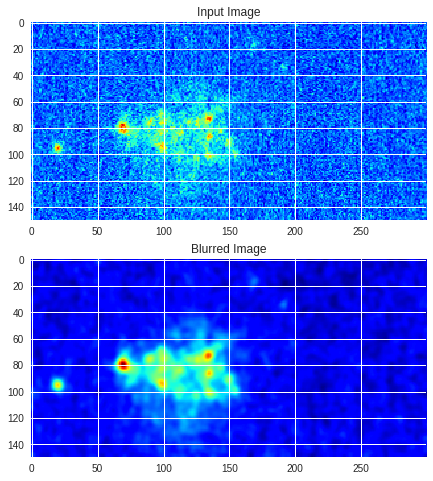

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, img_as_ubyte
from scipy.signal import convolve2d as conv2
import scipy.ndimage
import skimage
import math

#  Create a Laplacian-of-Gaussian Volume
# steps 1-3

img = io.imread(img_name,as_grey=True)
gau_img = skimage.filters.gaussian(img,2)
#plt.subplot(2,1,1),plt.imshow(img,cmap='jet'),plt.title('Input Image')
#plt.subplot(2,1,2),plt.imshow(gua_img,cmap='jet'),plt.title('Blurred Image')
col =1
row =2
ax=[]
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8, 8))
ax1.set_title("Input Image")
ax1.imshow(img,cmap='jet')
ax2.set_title("Blurred Image")
ax2.imshow(gua_img,cmap='jet')



  





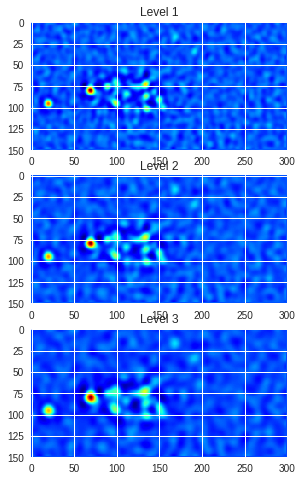

In [210]:
#steps 4 nd 5
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, img_as_ubyte
from scipy.signal import convolve2d as conv2
import scipy.ndimage
import skimage
import math
import cv2

img = io.imread(img_name,as_grey=True)
gau_img = skimage.filters.gaussian(img,2)


def LoG(sigma):
  k = int(2*round(3*sigma)+1)
  LoGd_1 = skimage.filters.gaussian(gau_img,sigma)
  LoGd_2 = skimage.filters.laplace(LoGd_1, k)
  return LoGd_2
#calculating 3 levels

LoG_Lv1 =LoG(3)
LoG_Lv2 =LoG(4)
LoG_Lv3 =LoG(5)


##plt.imshow(LoG_Lv1, cmap='jet')
#plt.imshow(LoG_Lv2, cmap='jet')
#plt.imshow(LoG_Lv3, cmap='jet')




#plotting
fig, (ax1, ax2,ax3) = plt.subplots(3,1, figsize=(8, 8))
ax1.set_title("Level 1")
ax1.imshow(LoG_Lv1,cmap='jet')
ax2.set_title("Level 2")
ax2.imshow(LoG_Lv2,cmap='jet')
ax3.set_title("Level 3")
ax3.imshow(LoG_Lv3,cmap='jet')




  






# Part2

(150, 300)
(150, 300)


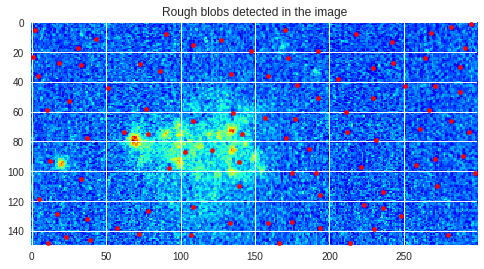

In [209]:
#Obtain a rough estimate of blob locations
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, img_as_ubyte
from scipy.signal import convolve2d as conv2
import scipy.ndimage
import skimage
import math
import cv2
#read img
img = io.imread(img_name,as_grey=True)
gau_img = skimage.filters.gaussian(img,2)
#get the width and heught of img
width = img.shape[0]
height = img.shape[1]


def LoG(sigma):
  k = int(2*round(3*sigma)+1)
  LoGd_1 = skimage.filters.gaussian(gau_img,sigma)
  LoGd_2 = skimage.filters.laplace(LoGd_1, k)
  return LoGd_2
#calculating 3 levels

LoG_Lv1 =LoG(3)
LoG_Lv2 =LoG(4)
LoG_Lv3 =LoG(5)


##plt.imshow(LoG_Lv1, cmap='jet')
#plt.imshow(LoG_Lv2, cmap='jet')
#plt.imshow(LoG_Lv3, cmap='jet')



LoG = np.zeros((width,height , 3), np.float32)
LoG[:, :, 0] = LoG_Lv1
LoG[:, :, 1] = LoG_Lv2
LoG[:, :, 2] = LoG_Lv3
#finding the minimmum
localmin = scipy.ndimage.filters.minimum_filter(LoG, size=20, mode='reflect', cval=0.0, origin=0)
# Convert local min values to binary mask
mask = (LoG == localmin)
mask = np.sum(mask, axis=2)
x, y = np.nonzero(mask)
fig, (ax1) = plt.subplots(1,1, figsize=(8, 8))
ax1.scatter(y, x,s=20, c='red')
ax1.set_title('Rough blobs detected in the image')
ax1.imshow(img,cmap='jet')

print(mask.shape)
print(img.shape)





  

# Part3

47
47.0 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


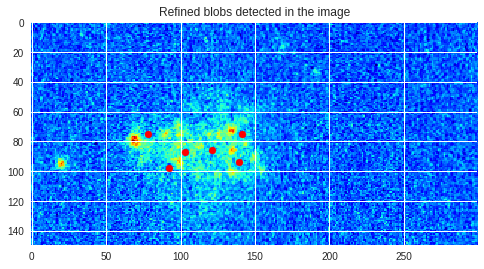

In [208]:
# Refine the blobs using Otsu thresholding
#Obtain a rough estimate of blob locations
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, img_as_ubyte
from scipy.signal import convolve2d as conv2
from skimage.filters import threshold_otsu
import scipy.ndimage
import skimage
import math
import cv2
#read img
img = io.imread(img_name,as_grey=True)
gau_img = img_as_ubyte(skimage.filters.gaussian(img2,5))

#got domension of image
width = img.shape[0]
height = img.shape[1]

## obtain the optimal threshold for this image
thresh = threshold_otsu(gau_img)
print(thresh)

cv_img = cv2.imread(img_name,0)
k = int(2*round(3*5)+1)
filtered = cv2.GaussianBlur(cv_img, (k, k), 5)
        
ret1, th1 = cv2.threshold(filtered, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret1,th1)
#binary = img2 <= thresh
for i in range(width):
  for j in range(height):
    if th1[i][j] <thresh:
      mask[i][j]=0
#plotting
x, y = np.nonzero(mask)
fig, (ax1)= plt.subplots(1,1,figsize=(8,8))
ax1.scatter(y, x, c='red')
ax1.set_title('Refined blobs detected in the image')
ax1.imshow(img,cmap='jet')
    
